<a href="https://colab.research.google.com/github/ykato27/Object-Detection/blob/main/CenterTrack_Tracking_Objects_as_Points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CenterTrack - Tracking Objects as Points
Simultaneous object detection and tracking using center points:
<img src="https://github.com/xingyizhou/CenterTrack/raw/master/readme/fig2.png">

**Original code :** [CenterTrack](https://github.com/xingyizhou/CenterTrack) by [Xingyi Zhou](https://github.com/xingyizhou)

**[Tracking Objects as Points](http://arxiv.org/abs/2004.01177)**,

Xingyi Zhou, Vladlen Koltun, Philipp Krähenbühl,

*arXiv technical report [(arXiv 2004.01177)](http://arxiv.org/abs/2004.01177)*

**Citation**
```
@article{zhou2020tracking,
  title={Tracking Objects as Points},
  author={Zhou, Xingyi and Koltun, Vladlen and Kr{\"a}henb{\"u}hl, Philipp},
  journal={ECCV},
  year={2020}
}
```

In [1]:
! nvidia-smi
!/usr/local/cuda/bin/nvcc --version

Mon Aug 23 03:30:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Installation
1. Install PyTorch:

In [2]:
import torch
print(torch.__version__)

1.9.0+cu102


In [3]:
! pip install torch==1.4.0 torchvision==0.5.0

     |████████████████████████████████| 753.4 MB 7.1 kB/s 
     |████████████████████████████████| 4.0 MB 20.8 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.4.0 which is incompatible.


2. Install [COCOAPI](https://github.com/cocodataset/cocoapi):

In [4]:
! pip install cython; pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-y7rui2ta
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-y7rui2ta
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263928 sha256=d823734ce0350766a8b6d0d313ce4b8a6db8b3264bf402db6375e55a7f8ca4e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-lvyua3qo/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.2
    Uninstalling pycocotools-2.0.2:
      Successfully uninstalled pycocotools-2.0.2


3. Clone this repo:

In [5]:
CenterTrack_ROOT="CenterTrack"
! git clone --recursive https://github.com/xingyizhou/CenterTrack $CenterTrack_ROOT
%cd CenterTrack

Cloning into 'CenterTrack'...
remote: Enumerating objects: 285, done.
remote: Total 285 (delta 0), reused 0 (delta 0), pack-reused 285
Receiving objects: 100% (285/285), 15.01 MiB | 23.07 MiB/s, done.
Resolving deltas: 100% (113/113), done.
/content/CenterTrack


You can manually install the [submodules](https://github.com/xingyizhou/CenterTrack/blob/master/.gitmodules) if you forget --recursive.

4. Install the requirements

In [6]:
! pip install -r requirements.txt
! apt-get install libx264-dev

     |████████████████████████████████| 305 kB 16.7 MB/s 
     |████████████████████████████████| 151 kB 49.8 MB/s 
     |████████████████████████████████| 7.1 MB 45.1 MB/s 
     |████████████████████████████████| 87 kB 6.8 MB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
     |████████████████████████████████| 73 kB 1.7 MB/s 
     |████████████████████████████████| 68 kB 6.9 MB/s 
     |████████████████████████████████| 41 kB 565 kB/s 
     |████████████████████████████████| 280 kB 45.8 MB/s 
     |████████████████████████████████| 99 kB 10.2 MB/s 
     |████████████████████████████████| 280 kB 50.8 MB/s 
     |████████████████████████████████| 280 kB 51.4 MB/s 
     |████████████████████████████████| 279 kB 53.5 MB/s 
     |████████████████████████████████| 279 kB 51.8 MB/s 
     |████████████████████████████████| 272 kB 53.1 MB/s 
     |████████████████████████████████| 272 kB 53.3 MB/s 
     |████████████████████████████████| 272 kB 53.4 MB/s 
     |███████████████████

In [7]:
%ls src/lib/model/networks/

backbones/     dla.py    generic_network.py  resdcn.py
base_model.py  dlav0.py  necks/              resnet.py


In [8]:
#%rm -r src/lib/model/networks/DCNv2

5. Compile deformable convolutional (from DCNv2).

In [9]:
# clone if it is not automatically downloaded by `--recursive`.
%%shell

cd src/lib/model/networks/
git clone https://github.com/CharlesShang/DCNv2/  
cd DCNv2/
./make.sh

Cloning into 'DCNv2'...
remote: Enumerating objects: 214, done.
remote: Total 214 (delta 0), reused 0 (delta 0), pack-reused 214
Receiving objects: 100% (214/214), 1.42 MiB | 21.97 MiB/s, done.
Resolving deltas: 100% (121/121), done.
running build
running build_ext
building '_ext' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/content
creating build/temp.linux-x86_64-3.7/content/CenterTrack
creating build/temp.linux-x86_64-3.7/content/CenterTrack/src
creating build/temp.linux-x86_64-3.7/content/CenterTrack/src/lib
creating build/temp.linux-x86_64-3.7/content/CenterTrack/src/lib/model
creating build/temp.linux-x86_64-3.7/content/CenterTrack/src/lib/model/networks
creating build/temp.linux-x86_64-3.7/content/CenterTrack/src/lib/model/networks/DCNv2
creating build/temp.linux-x86_64-3.7/content/CenterTrack/src/lib/model/networks/DCNv2/src
creating build/temp.linux-x86_64-3.7/content/CenterTrack/src/lib/model/networks/DCNv2/src/cpu
creatin

6. Download pertained models for [monocular 3D tracking](https://drive.google.com/open?id=1e8zR1m1QMJne-Tjp-2iY_o81hn2CiQRt), [80-category tracking](https://drive.google.com/open?id=1tJCEJmdtYIh8VuN8CClGNws3YO7QGd40), or [pose tracking](https://drive.google.com/open?id=1tJCEJmdtYIh8VuN8CClGNws3YO7QGd40) and move them to 
`$CenterTrack_ROOT/models/`. 

  More models can be found in [Model zoo](https://github.com/xingyizhou/CenterTrack/blob/master/readme/MODEL_ZOO.md).

In [10]:
%mkdir models
#! gdown --id 1e8zR1m1QMJne-Tjp-2iY_o81hn2CiQRt -O models/nuScenes_3Dtracking.pth
#! gdown --id 1tJCEJmdtYIh8VuN8CClGNws3YO7QGd40 -O models/coco_tracking.pth
#! gdown --id 1H0YvFYCOIZ06EzAkC2NxECNQGXxK27hH -O models/coco_pose_tracking.pth
! gdown --id 1sf1bWJ1LutwQ_wp176nd2Y3HII9WeFf0 -O models/mot17_half.pth
! gdown --id 1h_8Ts11rf0GQ4_n6FgmCeBuFcWrRjJfa -O models/mot17_fulltrain.pth

Downloading...
From: https://drive.google.com/uc?id=1sf1bWJ1LutwQ_wp176nd2Y3HII9WeFf0
To: /content/CenterTrack/models/mot17_half.pth
80.0MB [00:00, 111MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1h_8Ts11rf0GQ4_n6FgmCeBuFcWrRjJfa
To: /content/CenterTrack/models/mot17_fulltrain.pth
80.0MB [00:00, 120MB/s] 


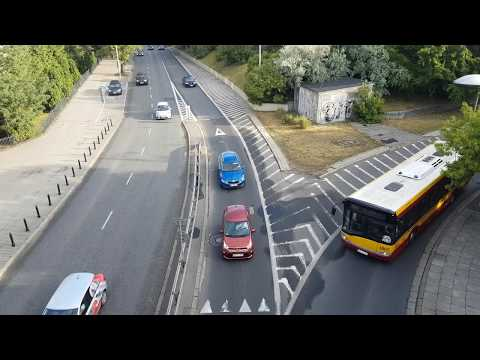

In [11]:
#!pip install youtube-dl
from IPython.display import YouTubeVideo

YOUTUBE_ID = 'MNn9qKG2UFI'   # car
#YOUTUBE_ID = 'MNn9qKG2UFI'   
#YOUTUBE_ID = '2bKXv_XviFc'    # pedestrian 

YouTubeVideo(YOUTUBE_ID)

In [12]:
#! rm -rf youtube.mp4
# download the youtube with the given ID
! youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube2.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
#! ffmpeg -y -loglevel info -i youtube2.mp4 -t 20 pedestrian.avi
! ffmpeg -y -loglevel info -i youtube.mp4 -t 20 road_traffic.mp4

/bin/bash: youtube-dl: command not found
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --ena

## Use CenterTrack

In [13]:
%cd src/

/content/CenterTrack/src


**Note:**
1. replace "cv2.imshow" in function show_all_image in "debugger.py(/src/lib/utils/)" with "pass"
2. comment out  "cv2.imshow" at line 80 in "demo.py".

Video clip from the [nuScenes dataset](https://www.nuscenes.org/?externalData=all&mapData=all&modalities=Any) in `videos/nuscenes_mini.mp4`. To test monocular 3D tracking on this video, run

In [14]:
! python demo.py tracking,ddd --load_model ../models/nuScenes_3Dtracking.pth --dataset nuscenes --pre_hm --track_thresh 0.1 --demo ../videos/nuscenes_mini.mp4 --test_focal_length 633 --save_video --video_h 480 --video_w 720 --debug 2
#! python demo.py tracking,ddd --load_model ../models/nuScenes_3Dtracking.pth --dataset nuscenes --pre_hm --track_thresh 0.1 --demo road_traffic.avi --save_video

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
Running tracking
Using tracking threshold for out threshold! 0.1
Fix size testing.
training chunk_sizes: [32]
input h w: 448 800
heads {'hm': 10, 'reg': 2, 'wh': 2, 'tracking': 2, 'dep': 1, 'rot': 8, 'dim': 3, 'amodel_offset': 2}
weights {'hm': 1, 'reg': 1, 'wh': 0.1, 'tracking': 1, 'dep': 1, 'rot': 1, 'dim': 1, 'amodel_offset': 1}
head conv {'hm': [256], 'reg': [256], 'wh': [256], 'tracking': [256], 'dep': [256], 'rot': [256], 'dim': [256], 'amodel_offset': [256]}
Creating model...
Using node type: (<class 'model.networks.dla.DeformConv'>, <class 'model.networks.dla.DeformConv'>)
Traceback (most recent call last):
  File "demo.py", line 128, in <module>
    demo(opt)
  File "demo.py", line 24, in demo
    detector = Detector(opt)
  File "/conten

You will need to specify test_focal_length for monocular 3D tracking demo to convert the image coordinate system back to 3D. The value 633 is half of a typical focal length (~1266) in nuScenes dataset in input resolution 1600x900. The mini demo video is in an input resolution of 800x448, so we need to use a half focal length. You don't need to set the test_focal_length when testing on the original nuScenes data.

Similarly, for 80-category tracking on images/ video, run:

In [15]:
! python demo.py tracking --load_model ../models/coco_tracking.pth --demo road_traffic.mp4

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
Running tracking
Using tracking threshold for out threshold! 0.3
Fix size testing.
training chunk_sizes: [32]
input h w: 512 512
heads {'hm': 80, 'reg': 2, 'wh': 2, 'tracking': 2}
weights {'hm': 1, 'reg': 1, 'wh': 0.1, 'tracking': 1}
head conv {'hm': [256], 'reg': [256], 'wh': [256], 'tracking': [256]}
Creating model...
Using node type: (<class 'model.networks.dla.DeformConv'>, <class 'model.networks.dla.DeformConv'>)
Traceback (most recent call last):
  File "demo.py", line 128, in <module>
    demo(opt)
  File "demo.py", line 24, in demo
    detector = Detector(opt)
  File "/content/CenterTrack/src/lib/detector.py", line 34, in __init__
    self.model = load_model(self.model, opt.load_model, opt)
  File "/content/CenterTrack/src/lib/model/model

If you want to test with person tracking models, you need to add --num_class 1:

In [16]:
! python demo.py tracking --load_model ../models/mot17_half.pth --num_class 1 --demo pedestrian.avi --save_video
#! python demo.py tracking --load_model ../models/mot17_fulltrain.pth --num_class 1 --demo pedestrian.avi --save_video --debug 2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
Running tracking
Using tracking threshold for out threshold! 0.3
Fix size testing.
training chunk_sizes: [32]
input h w: 512 512
heads {'hm': 1, 'reg': 2, 'wh': 2, 'tracking': 2}
weights {'hm': 1, 'reg': 1, 'wh': 0.1, 'tracking': 1}
head conv {'hm': [256], 'reg': [256], 'wh': [256], 'tracking': [256]}
Creating model...
Using node type: (<class 'model.networks.dla.DeformConv'>, <class 'model.networks.dla.DeformConv'>)
loaded ../models/mot17_half.pth, epoch 70
Drop parameter ltrb_amodal.0.weight.
Drop parameter ltrb_amodal.0.bias.
Drop parameter ltrb_amodal.2.weight.
Drop parameter ltrb_amodal.2.bias.
Drop parameter base.pre_hm_layer.0.weight.
Drop parameter base.pre_hm_layer.1.weight.
Drop parameter base.pre_hm_layer.1.bias.
Drop parameter base.pr

You can add --debug 2 to visualize the heatmap and offset predictions.

In [17]:
! python demo.py tracking --load_model ../models/mot17_half.pth --num_class 1 --debug 2 --demo video.mp4

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
Running tracking
Using tracking threshold for out threshold! 0.3
Fix size testing.
training chunk_sizes: [32]
input h w: 512 512
heads {'hm': 1, 'reg': 2, 'wh': 2, 'tracking': 2}
weights {'hm': 1, 'reg': 1, 'wh': 0.1, 'tracking': 1}
head conv {'hm': [256], 'reg': [256], 'wh': [256], 'tracking': [256]}
Creating model...
Using node type: (<class 'model.networks.dla.DeformConv'>, <class 'model.networks.dla.DeformConv'>)
loaded ../models/mot17_half.pth, epoch 70
Drop parameter ltrb_amodal.0.weight.
Drop parameter ltrb_amodal.0.bias.
Drop parameter ltrb_amodal.2.weight.
Drop parameter ltrb_amodal.2.bias.
Drop parameter base.pre_hm_layer.0.weight.
Drop parameter base.pre_hm_layer.1.weight.
Drop parameter base.pre_hm_layer.1.bias.
Drop parameter base.pr

For monocular 3D tracking, run

In [18]:
! python demo.py tracking,ddd --demo ../road_traffic.mp4 --load_model ../models/coco_tracking.pth --save_video

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
Running tracking
Using tracking threshold for out threshold! 0.3
Fix size testing.
training chunk_sizes: [32]
input h w: 448 800
heads {'hm': 10, 'reg': 2, 'wh': 2, 'tracking': 2, 'dep': 1, 'rot': 8, 'dim': 3, 'amodel_offset': 2}
weights {'hm': 1, 'reg': 1, 'wh': 0.1, 'tracking': 1, 'dep': 1, 'rot': 1, 'dim': 1, 'amodel_offset': 1}
head conv {'hm': [256], 'reg': [256], 'wh': [256], 'tracking': [256], 'dep': [256], 'rot': [256], 'dim': [256], 'amodel_offset': [256]}
Creating model...
Using node type: (<class 'model.networks.dla.DeformConv'>, <class 'model.networks.dla.DeformConv'>)
Traceback (most recent call last):
  File "demo.py", line 128, in <module>
    demo(opt)
  File "demo.py", line 24, in demo
    detector = Detector(opt)
  File "/conten

Similarly, for pose tracking, run:

In [19]:
! python demo.py tracking,multi_pose --load_model ../models/coco_pose.pth --demo video.mp4

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
Running tracking
Using tracking threshold for out threshold! 0.3
Fix size testing.
training chunk_sizes: [32]
input h w: 512 512
heads {'hm': 1, 'reg': 2, 'wh': 2, 'tracking': 2, 'hps': 34, 'hm_hp': 17, 'hp_offset': 2}
weights {'hm': 1, 'reg': 1, 'wh': 0.1, 'tracking': 1, 'hps': 1, 'hm_hp': 1, 'hp_offset': 1}
head conv {'hm': [256], 'reg': [256], 'wh': [256], 'tracking': [256], 'hps': [256], 'hm_hp': [256], 'hp_offset': [256]}
Creating model...
Using node type: (<class 'model.networks.dla.DeformConv'>, <class 'model.networks.dla.DeformConv'>)
Traceback (most recent call last):
  File "demo.py", line 128, in <module>
    demo(opt)
  File "demo.py", line 24, in demo
    detector = Detector(opt)
  File "/content/CenterTrack/src/lib/detector.py", lin

## Training on custom dataset
If you want to train CenterTrack on your own dataset, you can use `--dataset custom` and manually specify the annotation file, image path, input resolutions, and number of categories. You still need to create the annotation files in COCO format (referring to the many `convert_X_to_coco.py` examples in tools). For example, you can use the following command to train on our [mot17 experiment](https://github.com/xingyizhou/CenterTrack/blob/master/experiments/mot17_half_sc.sh) without using the pre-defined mot dataset file:

In [20]:
! python main.py tracking --exp_id mot17_half_sc --dataset custom --custom_dataset_ann_path ../data/mot17/annotations/train_half.json --custom_dataset_img_path ../data/mot17/train/ --input_h 544 --input_w 960 --num_classes 1 --pre_hm --ltrb_amodal --same_aug --hm_disturb 0.05 --lost_disturb 0.4 --fp_disturb 0.1 --gpus 0

Running tracking
Using tracking threshold for out threshold! 0.3
Fix size testing.
training chunk_sizes: [32]
input h w: 544 960
heads {'hm': 1, 'reg': 2, 'wh': 2, 'tracking': 2, 'ltrb_amodal': 4}
weights {'hm': 1, 'reg': 1, 'wh': 0.1, 'tracking': 1, 'ltrb_amodal': 0.1}
head conv {'hm': [256], 'reg': [256], 'wh': [256], 'tracking': [256], 'ltrb_amodal': [256]}
Namespace(K=100, add_05=False, amodel_offset_weight=1, arch='dla_34', aug_rot=0, backbone='dla34', batch_size=32, chunk_sizes=[32], custom_dataset_ann_path='../data/mot17/annotations/train_half.json', custom_dataset_img_path='../data/mot17/train/', data_dir='/content/CenterTrack/src/lib/../../data', dataset='custom', dataset_version='', debug=0, debug_dir='/content/CenterTrack/src/lib/../../exp/tracking/mot17_half_sc/debug', debugger_theme='white', demo='', dense_reg=1, dep_weight=1, depth_scale=1, dim_weight=1, dla_node='dcn', down_ratio=4, efficient_level=0, eval_val=False, exp_dir='/content/CenterTrack/src/lib/../../exp/tracki

## Benchmark Evaluation and Training
After installation, follow the instructions in [DATA.md](https://github.com/xingyizhou/CenterTrack/blob/master/readme/DATA.md) to setup the datasets. Then check [GETTING_STARTED.md](https://github.com/xingyizhou/CenterTrack/blob/master/readme/GETTING_STARTED.md) to reproduce the results in the paper. We provide scripts for all the experiments in the [experiments folder](https://github.com/xingyizhou/CenterTrack/blob/master/experiments).

### **Benchmark evaluation**
First, download the models you want to evaluate from our model zoo and put them in CenterTrack_ROOT/models/.

**MOT17**

To test the tracking performance on MOT17 with our pretrained model, run

In [21]:
! python test.py tracking --exp_id mot17_half --dataset mot --dataset_version 17halfval --pre_hm --ltrb_amodal --track_thresh 0.4 --pre_thresh 0.5 --load_model ../models/mot17_half.pth

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
Running tracking
Using tracking threshold for out threshold! 0.4
Fix size testing.
training chunk_sizes: [32]
input h w: 544 960
heads {'hm': 1, 'reg': 2, 'wh': 2, 'tracking': 2, 'ltrb_amodal': 4}
weights {'hm': 1, 'reg': 1, 'wh': 0.1, 'tracking': 1, 'ltrb_amodal': 0.1}
head conv {'hm': [256], 'reg': [256], 'wh': [256], 'tracking': [256], 'ltrb_amodal': [256]}
Namespace(K=100, add_05=False, amodel_offset_weight=1, arch='dla_34', aug_rot=0, backbone='dla34', batch_size=32, chunk_sizes=[32], custom_dataset_ann_path='', custom_dataset_img_path='', data_dir='/content/CenterTrack/src/lib/../../data', dataset='mot', dataset_version='17halfval', debug=0, debug_dir='/content/CenterTrack/src/lib/../../exp/tracking/mot17_half/debug', debugger_theme='white'

This will give a MOTA of `66.1` if set up correctly. `--pre_hm` is to enable the input heatmap. `--ltrb_amodal` is to use the left, top, right, bottom bounding box representation to enable detecting out-of-image bounding box (We observed this is important for MOT datasets). And `--track_thresh` and `--pre_thresh` are the score threshold for predicting a bounding box ($\theta$ in the paper) and feeding the heatmap to the next frame ($\tau$ in the paper), respectively.

To test with public detection, run

In [22]:
! python test.py tracking --exp_id mot17_half_public --dataset mot --dataset_version 17halfval --pre_hm --ltrb_amodal --track_thresh 0.4 --pre_thresh 0.5 --load_model ../models/mot17_half.pth --public_det --load_results ../data/mot17/results/val_half_det.json

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
Running tracking
Using tracking threshold for out threshold! 0.4
Fix size testing.
training chunk_sizes: [32]
input h w: 544 960
heads {'hm': 1, 'reg': 2, 'wh': 2, 'tracking': 2, 'ltrb_amodal': 4}
weights {'hm': 1, 'reg': 1, 'wh': 0.1, 'tracking': 1, 'ltrb_amodal': 0.1}
head conv {'hm': [256], 'reg': [256], 'wh': [256], 'tracking': [256], 'ltrb_amodal': [256]}
Namespace(K=100, add_05=False, amodel_offset_weight=1, arch='dla_34', aug_rot=0, backbone='dla34', batch_size=32, chunk_sizes=[32], custom_dataset_ann_path='', custom_dataset_img_path='', data_dir='/content/CenterTrack/src/lib/../../data', dataset='mot', dataset_version='17halfval', debug=0, debug_dir='/content/CenterTrack/src/lib/../../exp/tracking/mot17_half_public/debug', debugger_theme=

The expected MOTA is `63.1`.

To test on the test set, run

### Training
We have packed all the training scripts in the [experiments folder](https://github.com/xingyizhou/CenterTrack/blob/master/experiments). The experiment names correspond to the model name in the [model zoo](https://github.com/xingyizhou/CenterTrack/blob/master/experiments). The number of GPUs for each experiment can be found in the scripts and the model zoo. If the training is terminated before finishing, you can use the same command with `--resume` to resume training. It will found the latest model with the same `exp_id`. Some experiments rely on pretraining on another model. In this case, download the pretrained model from our model zoo or train that model first.